# NLP Ensemble approach
By Group 16

First Level: Multinomial Bayes model <br>
Second level: Support Vector Machine

I first experimented with how to feed the data into the first level of models.  I tried to see if the BOW MultinomialNB models or TF-IDF MultinomialNB models performed better.  I also tried to see if processing the words lead to better results.

At the second level, I tried Random Forest Classification, Support Vector Machine and Logistic Regression.  I went with  SVM in the end.



In [ ]:
import re
import string
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve,roc_curve
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet, stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('fake_job_postings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.fillna('empty',inplace=True)

In [ ]:
columns=['job_id','telecommuting','has_company_logo','has_questions', 'salary_range','employment_type']
#remove columns not required for next steps 
for colu in columns:
    del df[colu]

In [ ]:
#df.head()
X = df[["title", "company_profile", "description", "requirements","benefits"]]
Y = df["fraudulent"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)

In [ ]:
X_train_title = X_train['title']
X_test_title = X_test['title']

X_train_profile = X_train["company_profile"]
X_test_profile = X_test["company_profile"]

X_train_description = X_train["description"]
X_test_description = X_test["description"]

X_train_requirements = X_train["requirements"]
X_test_requirements = X_test["requirements"]

X_train_benefits = X_train["benefits"]
X_test_benefits = X_test["benefits"]

features = {'title':(X_train_title, X_test_title),
            'profile':(X_train_profile, X_test_profile),
            'description':(X_train_description, X_test_description),
            'requirements':(X_train_requirements, X_test_requirements),
            'benefits':(X_train_benefits, X_test_benefits)}

## Bag of Words MultinomialNB Models

I used a MultinomialNB model after fitting in a BOW matrix for each column.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

def tokenize_test(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')

    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()

    #RFC
    #nb = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")
    
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Metrics--------")
    # print the accuracy of its predictions
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))

    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))

In [ ]:
from sklearn import metrics

for key, values in features.items():
  print("column : ", key.upper())
  tokenize_test(values[0], y_train, values[1], y_test, CountVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english', max_df=0.5))
  print("\n")

column :  TITLE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Features:  44133
Training Accuracy:  0.9683693760874968
--------Test Metrics--------
Accuracy Score: 0.970917225950783
Precision Score: 0.8837209302325582
Recall Score: 0.4470588235294118
F1 Score: 0.5937500000000001
ROC Score: 0.9061966771441401


column :  PROFILE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Features:  312840
Training Accuracy:  0.8676360924683072
--------Test Metrics--------
Accuracy Score: 0.8668903803131991
Precision Score: 0.13043478260869565
Recall Score: 0.3176470588235294
F1 Score: 0.18493150684931506
ROC Score: 0.8562363994335256


column :  DESCRIPTION


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Features:  2682359
Training Accuracy:  0.9924807357693264
--------Test Metrics--------
Accuracy Score: 0.982662192393736
Precision Score: 0.95
Recall Score: 0.6705882352941176
F1 Score: 0.786206896551724
ROC Score: 0.9185174950778902


column :  REQUIREMENTS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Features:  1415399
Training Accuracy:  0.9855828983345762
--------Test Metrics--------
Accuracy Score: 0.9742729306487695
Precision Score: 0.975609756097561
Recall Score: 0.47058823529411764
F1 Score: 0.6349206349206349
ROC Score: 0.8898276398051881


column :  BENEFITS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Features:  293460
Training Accuracy:  0.9172259507829977
--------Test Metrics--------
Accuracy Score: 0.953579418344519
Precision Score: 0.5138888888888888
Recall Score: 0.43529411764705883
F1 Score: 0.4713375796178344
ROC Score: 0.8422990570273912




Some results: the description column seems to have a high f1 score.


## TFIDF MultinomialNB Models
The cleaned data is fitted by a tf-idf vectoriser and fed into MultinomialNB models.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

def tf_idf_test(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')
    # create tf-idf matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()

    
    # #RFC
    # nb = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")

    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Metrics--------")
    # print the accuracy of its predictions
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))

    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

for key, values in features.items():
  print("column : ", key.upper())
  tf_idf_test(values[0], y_train, values[1], y_test, TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')) #, max_df=0.3
  print("\n")



column :  TITLE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Features:  44133
Training Accuracy:  0.9601665423813075
--------Test Metrics--------
Accuracy Score: 0.9625279642058165
Precision Score: 1.0
Recall Score: 0.21176470588235294
F1 Score: 0.34951456310679613
ROC Score: 0.8924769438015958


column :  PROFILE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Features:  312840
Training Accuracy:  0.9589236887894605
--------Test Metrics--------
Accuracy Score: 0.9608501118568232
Precision Score: 0.6923076923076923
Recall Score: 0.3176470588235294
F1 Score: 0.4354838709677419
ROC Score: 0.8891230009326103


column :  DESCRIPTION


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Features:  2682359
Training Accuracy:  0.9623415361670395
--------Test Metrics--------
Accuracy Score: 0.9642058165548099
Precision Score: 1.0
Recall Score: 0.24705882352941178
F1 Score: 0.39622641509433965
ROC Score: 0.8827605264066872


column :  REQUIREMENTS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Features:  1415400
Training Accuracy:  0.9592344021874223
--------Test Metrics--------
Accuracy Score: 0.9608501118568232
Precision Score: 1.0
Recall Score: 0.17647058823529413
F1 Score: 0.3
ROC Score: 0.8443507996269559


column :  BENEFITS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Features:  293460
Training Accuracy:  0.9657593835446184
--------Test Metrics--------
Accuracy Score: 0.9653243847874721
Precision Score: 1.0
Recall Score: 0.27058823529411763
F1 Score: 0.42592592592592593
ROC Score: 0.8225553521467306




##Processed BOW in MultinomialNB models
This section includes steps in stemming and lemmatization before feeding the data into the count vectorizer.  

The results are mostly quite similar to unprocessed data.

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
revisions = [stemmer.stem(word) for word in X_train_title]

In [ ]:
#revisions
# pip install tabulate
from tabulate import tabulate
print (tabulate({"Original": X_train_title[0:5],"Stemmed": revisions[0:5]}, headers="keys"))

Original                                            Stemmed
--------------------------------------------------  --------------------------------------------------
Software Engineer                                   software engin
Production Planner                                  production plann
Graduates: English Teacher Abroad (Conversational)  graduates: english teacher abroad (conversational)
Account Manager, Strategic Partnerships             account manager, strategic partnership
Junior QA/Software Engineer                         junior qa/software engin


In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer

def tokenize_test_stemmed(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')

    #Stemming
    stemmer = SnowballStemmer(language='english')
    X_train = [stemmer.stem(word) for word in X_train]
    X_test = [stemmer.stem(word) for word in X_test]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    X_train = [lemmatizer.lemmatize(word) for word in X_train]
    X_test = [lemmatizer.lemmatize(word) for word in X_test]

    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)

    # stemmer = SnowballStemmer(language='english')
    # X_train_dtm = [stemmer.stem(word) for word in X_train_dtm]
    # X_test_dtm = [stemmer.stem(word) for word in X_train_dtm]
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()

    
    #RFC
    #nb = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")

    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Metrics--------")
    # print the accuracy of its predictions
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))

    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn import metrics

for key, values in features.items():
  print("column : ", key.upper())
  tokenize_test_stemmed(values[0], y_train, values[1], y_test, CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5))  #, max_df = 0.5
  print("\n")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


column :  TITLE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  41783
Training Accuracy:  0.9697986577181208
--------Test Metrics--------
Accuracy Score: 0.9686800894854586
Precision Score: 0.8222222222222222
Recall Score: 0.43529411764705883
F1 Score: 0.5692307692307692
ROC Score: 0.8888121308417671


column :  PROFILE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  297665
Training Accuracy:  0.8685682326621924
--------Test Metrics--------
Accuracy Score: 0.8674496644295302
Precision Score: 0.13106796116504854
Recall Score: 0.3176470588235294
F1 Score: 0.18556701030927836
ROC Score: 0.8561051431729474


column :  DESCRIPTION


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  2574687
Training Accuracy:  0.993847874720358
--------Test Metrics--------
Accuracy Score: 0.9821029082774049
Precision Score: 0.9491525423728814
Recall Score: 0.6588235294117647
F1 Score: 0.7777777777777778
ROC Score: 0.9158301958481572


column :  REQUIREMENTS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  1362761
Training Accuracy:  0.9852721849366145
--------Test Metrics--------
Accuracy Score: 0.9725950782997763
Precision Score: 0.9736842105263158
Recall Score: 0.43529411764705883
F1 Score: 0.6016260162601627
ROC Score: 0.890325031950537


column :  BENEFITS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  277406
Training Accuracy:  0.9210787969177231
--------Test Metrics--------
Accuracy Score: 0.9546979865771812
Precision Score: 0.5303030303030303
Recall Score: 0.4117647058823529
F1 Score: 0.4635761589403973
ROC Score: 0.8313771545024351




##Processed TF-IDF in Multinomial Models

The textual columns were cleaned, tokenized, stemmed, lemmatized etc and fed into MultinomialNB models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer

def tf_idf_test_processed(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')

    #Stemming
    stemmer = SnowballStemmer(language='english')
    X_train = [stemmer.stem(word) for word in X_train]
    X_test = [stemmer.stem(word) for word in X_test]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    X_train = [lemmatizer.lemmatize(word) for word in X_train]
    X_test = [lemmatizer.lemmatize(word) for word in X_test]

    # create tf-idf matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()

    
    # #RFC
    # nb = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")

    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Metrics--------")
    # print the accuracy of its predictions
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))

    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

for key, values in features.items():
  print("column : ", key.upper())
  tf_idf_test_processed(values[0], y_train, values[1], y_test, TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english'))
  print("\n")

column :  TITLE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  41783
Training Accuracy:  0.9591101168282377
--------Test Metrics--------
Accuracy Score: 0.9614093959731543
Precision Score: 1.0
Recall Score: 0.18823529411764706
F1 Score: 0.31683168316831684
ROC Score: 0.8658733722496632


column :  PROFILE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  297665
Training Accuracy:  0.9600422570221228
--------Test Metrics--------
Accuracy Score: 0.9619686800894854
Precision Score: 0.7297297297297297
Recall Score: 0.3176470588235294
F1 Score: 0.4426229508196722
ROC Score: 0.8606818417325827


column :  DESCRIPTION


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  2574687
Training Accuracy:  0.9612851106139697
--------Test Metrics--------
Accuracy Score: 0.9636465324384788
Precision Score: 1.0
Recall Score: 0.23529411764705882
F1 Score: 0.38095238095238093
ROC Score: 0.8795551103588823


column :  REQUIREMENTS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  1362762
Training Accuracy:  0.95917225950783
--------Test Metrics--------
Accuracy Score: 0.9608501118568232
Precision Score: 1.0
Recall Score: 0.17647058823529413
F1 Score: 0.3
ROC Score: 0.857010120548513


column :  BENEFITS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


Features:  277406
Training Accuracy:  0.9648893860303256
--------Test Metrics--------
Accuracy Score: 0.9653243847874721
Precision Score: 1.0
Recall Score: 0.27058823529411763
F1 Score: 0.42592592592592593
ROC Score: 0.7974508652550862




##Findings from tuning
There is no significant difference in model performance whether the data is processed or not.  However, the inclusion of unigram, bigram, trigram and quadgrams greatly improve f1 score.  This would imply that certain phrases are highly predictive of fraud entries.

#Ensemble Learning first level
First, I cleaned the data, removed stop words, stemmed, lemmatized the data using the NLTK package.  Then I created countVectorizers objects to tokenize the data.  This can also help me retrieve feature importance later.

I obtain 5 BOW matrices and 5 TF-IDF matrices from the 5 columns. Then, I fed each matrix into a MultinomialNB model each to give me 10 columns of predicted results.

In [ ]:
cv_title = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)
cv_profile = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)
cv_description = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)
cv_requirement = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)
cv_benefit = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

X_train_title = X_train_title.str.replace('[^a-zA-Z0-9 ]', '')
X_test_title = X_test_title.str.replace('[^a-zA-Z0-9 ]', '')

X_train_profile = X_train_profile.str.replace('[^a-zA-Z0-9 ]', '')
X_test_profile = X_test_profile.str.replace('[^a-zA-Z0-9 ]', '')

X_train_description = X_train_description.str.replace('[^a-zA-Z0-9 ]', '')
X_test_description = X_test_description.str.replace('[^a-zA-Z0-9 ]', '')

X_train_requirements = X_train_requirements.str.replace('[^a-zA-Z0-9 ]', '')
X_test_requirements = X_test_requirements.str.replace('[^a-zA-Z0-9 ]', '')

X_train_benefits = X_train_benefits.str.replace('[^a-zA-Z0-9 ]', '')
X_test_benefits = X_test_benefits.str.replace('[^a-zA-Z0-9 ]', '')

#stemming
X_train_title_pro = [stemmer.stem(word) for word in X_train_title]
X_test_title_pro = [stemmer.stem(word) for word in X_test_title]

X_train_profile_pro = [stemmer.stem(word) for word in X_train_profile]
X_test_profile_pro = [stemmer.stem(word) for word in X_test_profile]

X_train_description_pro = [stemmer.stem(word) for word in X_train_description]
X_test_description_pro = [stemmer.stem(word) for word in X_test_description]

X_train_requirements_pro = [stemmer.stem(word) for word in X_train_requirements]
X_test_requirements_pro = [stemmer.stem(word) for word in X_test_requirements]

X_train_benefits_pro = [stemmer.stem(word) for word in X_train_benefits]
X_test_benefits_pro = [stemmer.stem(word) for word in X_test_benefits]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/

In [ ]:
#lemmatization
X_train_title_pro = [lemmatizer.lemmatize(word) for word in X_train_title]
X_test_title_pro = [lemmatizer.lemmatize(word) for word in X_test_title]

X_train_profile_pro = [lemmatizer.lemmatize(word) for word in X_train_profile]
X_test_profile_pro = [lemmatizer.lemmatize(word) for word in X_test_profile]

X_train_description_pro = [lemmatizer.lemmatize(word) for word in X_train_description]
X_test_description_pro = [lemmatizer.lemmatize(word) for word in X_test_description]

X_train_requirements_pro = [lemmatizer.lemmatize(word) for word in X_train_requirements]
X_test_requirements_pro = [lemmatizer.lemmatize(word) for word in X_test_requirements]

X_train_benefits_pro = [lemmatizer.lemmatize(word) for word in X_train_benefits]
X_test_benefits_pro = [lemmatizer.lemmatize(word) for word in X_test_benefits]

In [ ]:
features_pro = {'title':(X_train_title_pro, X_test_title_pro),
            'profile':(X_train_profile_pro, X_test_profile_pro),
            'description':(X_train_description_pro, X_test_description_pro),
            'requirements':(X_train_requirements_pro, X_test_requirements_pro),
            'benefits':(X_train_benefits_pro, X_test_benefits_pro)}

In [ ]:
nb_title = MultinomialNB()
nb_profile = MultinomialNB()
nb_description = MultinomialNB()
nb_requirements = MultinomialNB()
nb_benefits = MultinomialNB()

In [ ]:
X_train_title_bow = cv_title.fit_transform(X_train_title_pro)
X_test_title_bow = cv_title.transform(X_test_title_pro)

X_train_profile_bow = cv_profile.fit_transform(X_train_profile_pro)
X_test_profile_bow = cv_profile.transform(X_test_profile_pro)

X_train_description_bow = cv_description.fit_transform(X_train_description_pro)
X_test_description_bow = cv_description.transform(X_test_description_pro)

X_train_requirements_bow = cv_requirement.fit_transform(X_train_requirements_pro)
X_test_requirements_bow = cv_requirement.transform(X_test_requirements_pro)

X_train_benefits_bow = cv_benefit.fit_transform(X_train_benefits_pro)
X_test_benefits_bow = cv_benefit.transform(X_test_benefits_pro)

In [ ]:
# defining parameter range 
from sklearn.model_selection import GridSearchCV
nb_param_grid = {'alpha': [1, 0, 0.1, 0.01, 0.001],  
              'fit_prior': [False, True], 
              }  
   
nb_title_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
nb_profile_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
nb_description_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
nb_requirements_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
nb_benefits_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 

In [ ]:
# fitting the model for grid search 
nb_title_tuned = nb_title_tuned.fit(X_train_title_bow, y_train)
nb_profile_tuned = nb_profile_tuned.fit(X_train_profile_bow, y_train)
nb_description_tuned = nb_description_tuned.fit(X_train_description_bow, y_train)
nb_requirements_tuned = nb_requirements_tuned.fit(X_train_requirements_bow, y_train)
nb_benefits_tuned = nb_benefits_tuned.fit(X_train_benefits_bow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.809 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.820 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.858 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.809 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.820 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.858 total time=   0.0s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.865 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.871 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.880 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.865 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.871 total time=   0.0s
[CV 3/3] END ...........alpha=0, fit_prior=True;

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.834 total time=   0.0s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.829 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.862 total time=   0.0s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.834 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.829 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.862 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.853 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.846 total time=   0.0s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.873 total time=   0.0s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.853 total time=   0.0s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.846 total time=   0.0s
[CV 3/3] END ........alpha=0.01, fit_prior=True;, score=0.874 total time=   0.0s
[CV 1/3] END ......alpha=0.0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.844 total time=   0.1s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.836 total time=   0.1s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.833 total time=   0.1s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.844 total time=   0.1s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.836 total time=   0.1s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.939 total time=   0.1s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.936 total time=   0.1s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.934 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.939 total time=   0.1s
[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.936 total time=   0.1s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.868 total time=   0.1s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.870 total time=   0.1s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.868 total time=   0.1s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.869 total time=   0.1s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.870 total time=   0.1s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.868 total time=   0.1s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.906 total time=   0.1s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.904 total time=   0.1s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.905 total time=   0.1s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.906 total time=   0.1s
[CV 2/3] END ........alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.917 total time=   0.3s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.907 total time=   0.3s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.937 total time=   0.3s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.918 total time=   0.3s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.908 total time=   0.3s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.939 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.931 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.909 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.952 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.931 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.909 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.953 total time=   0.3s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.740 total time=   0.3s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.742 total time=   0.3s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.741 total time=   0.3s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.740 total time=   0.3s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.743 total time=   0.3s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.744 total time=   0.3s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.755 total time=   0.3s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.756 total time=   0.3s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.755 total time=   0.3s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.756 total time=   0.3s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.756 total time=   0.3s
[CV 3/3] END ........alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.839 total time=   0.2s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.827 total time=   0.2s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.850 total time=   0.1s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.839 total time=   0.2s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.827 total time=   0.1s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.851 total time=   0.2s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.880 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.862 total time=   0.2s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.893 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.880 total time=   0.2s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.862 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.893 total time=   0.2s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.679 total time=   0.2s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.676 total time=   0.2s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.679 total time=   0.2s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.679 total time=   0.2s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.678 total time=   0.2s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.681 total time=   0.2s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.690 total time=   0.2s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.689 total time=   0.2s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.694 total time=   0.2s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.692 total time=   0.2s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.689 total time=   0.2s
[CV 3/3] END ........alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.773 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.787 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.767 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.773 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.788 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.826 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.818 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.839 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.826 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.818 total time=   0.1s
[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.839 total time=   0.0s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.766 total time=   0.1s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.768 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.777 total time=   0.0s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.766 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.768 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.778 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.781 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.782 total time=   0.0s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.795 total time=   0.0s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.782 total time=   0.0s
[CV 2/3] END ........alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


This gives the best multinomialNB parameters.

In [ ]:
# print best parameter after tuning 
print(nb_title_tuned.best_params_) 
print(nb_profile_tuned.best_params_) 
print(nb_description_tuned.best_params_) 
print(nb_requirements_tuned.best_params_) 
print(nb_benefits_tuned.best_params_)

#result:
# {'alpha': 0, 'fit_prior': True}
# {'alpha': 0, 'fit_prior': True}
# {'alpha': 0, 'fit_prior': True}
# {'alpha': 0, 'fit_prior': True}
# {'alpha': 0, 'fit_prior': True}

{'alpha': 0, 'fit_prior': True}
{'alpha': 0, 'fit_prior': True}
{'alpha': 0, 'fit_prior': True}
{'alpha': 0, 'fit_prior': True}
{'alpha': 0, 'fit_prior': True}


In [ ]:
nb_title_train_pred = nb_title_tuned.predict(X_train_title_bow)
nb_profile_train_pred = nb_profile_tuned.predict(X_train_profile_bow)
nb_description_train_pred = nb_description_tuned.predict(X_train_description_bow)
nb_requirements_train_pred = nb_requirements_tuned.predict(X_train_requirements_bow)
nb_benefits_train_pred = nb_benefits_tuned.predict(X_train_benefits_bow)

In [ ]:
X_train_pred = [nb_title_train_pred, nb_profile_train_pred, nb_description_train_pred, nb_description_train_pred, nb_benefits_train_pred]
X_train_pred = np.array(X_train_pred)
X_train_pred = X_train_pred.T

In [ ]:
rfc = RandomForestClassifier(oob_score = True)
result = rfc.fit(X_train_pred,y_train)

Accuracy Score: 0.9993785732040765
Precision Score: 0.9898348157560356
Recall Score: 0.9974391805377721
F1 Score: 0.993622448979592
ROC Score: 0.9992824821701419


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


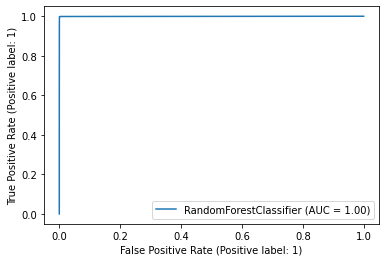

In [ ]:
#Training results
y_train_rfc_pred = rfc.predict(X_train_pred)

print('Accuracy Score:', (accuracy_score(y_train, y_train_rfc_pred)))
print('Precision Score:', (precision_score(y_train, y_train_rfc_pred)))
print('Recall Score:', (recall_score(y_train,y_train_rfc_pred)))
print('F1 Score:', (f1_score(y_train, y_train_rfc_pred)))

y_score_rf = rfc.predict_proba(X_train_pred)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf[:,1])))
print(plot_roc_curve(rfc, X_train_pred, y_train))

In [ ]:
#Finding X_test_pred from making mnb predictions
nb_title_test_pred = nb_title_tuned.predict(X_test_title_bow)
nb_profile_test_pred = nb_profile_tuned.predict(X_test_profile_bow)
nb_description_test_pred = nb_description_tuned.predict(X_test_description_bow)
nb_requirements_test_pred = nb_requirements_tuned.predict(X_test_requirements_bow)
nb_benefits_test_pred = nb_benefits_tuned.predict(X_test_benefits_bow)

In [ ]:
X_test_pred = [nb_title_test_pred, nb_profile_test_pred, nb_description_test_pred, nb_description_test_pred, nb_benefits_test_pred]
X_test_pred = np.array(X_test_pred)
X_test_pred = X_test_pred.T

I fitted the BOW models into a random forest and generated a f1 of 0.8.

Accuracy Score: 0.9860178970917226
Precision Score: 0.9838709677419355
Recall Score: 0.7176470588235294
F1 Score: 0.8299319727891156
ROC Score: 0.9013125626057821


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


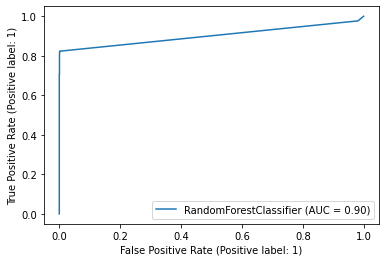

In [ ]:
#Testing results
y_test_rfc_pred = rfc.predict(X_test_pred)

print('Accuracy Score:', (accuracy_score(y_test, y_test_rfc_pred)))
print('Precision Score:', (precision_score(y_test, y_test_rfc_pred)))
print('Recall Score:', (recall_score(y_test,y_test_rfc_pred)))
print('F1 Score:', (f1_score(y_test, y_test_rfc_pred)))

y_score_rf_test = rfc.predict_proba(X_test_pred)
print('ROC Score:', (roc_auc_score(y_test, y_score_rf_test[:,1])))
print(plot_roc_curve(rfc, X_test_pred, y_test))

In [ ]:
#inclusion of tfidf

In [ ]:
tfidf_vect_title = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')
tfidf_vect_profile = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')
tfidf_vect_description = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')
tfidf_vect_requirements = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')
tfidf_vect_benefits = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')

tfidfnb_title_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
tfidfnb_profile_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
tfidfnb_description_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
tfidfnb_requirements_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
tfidfnb_benefits_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 

In [ ]:
X_train_title_tfidf = tfidf_vect_title.fit_transform(X_train_title_pro)
X_test_title_tfidf = tfidf_vect_title.transform(X_test_title_pro)

X_train_profile_tfidf = tfidf_vect_profile.fit_transform(X_train_profile_pro)
X_test_profile_tfidf = tfidf_vect_profile.transform(X_test_profile_pro)

X_train_description_tfidf = tfidf_vect_description.fit_transform(X_train_description_pro)
X_test_description_tfidf = tfidf_vect_description.transform(X_test_description_pro)

X_train_requirements_tfidf = tfidf_vect_requirements.fit_transform(X_train_requirements_pro)
X_test_requirements_tfidf = tfidf_vect_requirements.transform(X_test_requirements_pro)

X_train_benefits_tfidf = tfidf_vect_benefits.fit_transform(X_train_benefits_pro)
X_test_benefits_tfidf = tfidf_vect_benefits.transform(X_test_benefits_pro)

In [ ]:
# fitting the model for grid search 
nb_title_tuned_tfidf = tfidfnb_title_tuned.fit(X_train_title_tfidf, y_train)
nb_profile_tuned_tfidf = tfidfnb_profile_tuned.fit(X_train_profile_tfidf, y_train)
nb_description_tuned_tfidf = tfidfnb_description_tuned.fit(X_train_description_tfidf, y_train)
nb_requirements_tuned_tfidf = tfidfnb_requirements_tuned.fit(X_train_requirements_tfidf, y_train)
nb_benefits_tuned_tfidf = tfidfnb_benefits_tuned.fit(X_train_benefits_tfidf, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.796 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.795 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.849 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.796 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.795 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.849 total time=   0.0s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.875 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.871 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.888 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.875 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.871 total time=   0.0s
[CV 3/3] END ...........alpha=0, fit_prior=True;

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.833 total time=   0.0s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.823 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.869 total time=   0.0s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.833 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.823 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.869 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.853 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.841 total time=   0.0s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.878 total time=   0.0s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.853 total time=   0.0s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.841 total time=   0.0s
[CV 3/3] END ........alpha=0.01, fit_prior=True;, score=0.878 total time=   0.0s
[CV 1/3] END ......alpha=0.0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.895 total time=   0.1s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.890 total time=   0.1s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.890 total time=   0.1s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.895 total time=   0.1s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.890 total time=   0.1s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.915 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.916 total time=   0.1s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.916 total time=   0.1s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.915 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.916 total time=   0.1s
[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.917 total time=   0.1s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.833 total time=   0.1s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.844 total time=   0.1s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.830 total time=   0.1s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.833 total time=   0.1s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.844 total time=   0.1s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.830 total time=   0.1s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.855 total time=   0.1s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.862 total time=   0.1s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.859 total time=   0.1s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.855 total time=   0.1s
[CV 2/3] END ........alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.874 total time=   0.3s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.871 total time=   0.3s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.907 total time=   0.3s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.874 total time=   0.3s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.871 total time=   0.3s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.907 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.951 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.935 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.964 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.952 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.935 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.965 total time=   0.3s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.931 total time=   0.3s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.926 total time=   0.4s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.952 total time=   0.3s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.931 total time=   0.3s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.926 total time=   0.3s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.952 total time=   0.3s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.893 total time=   0.3s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.893 total time=   0.3s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.911 total time=   0.3s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.895 total time=   0.3s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.895 total time=   0.4s
[CV 3/3] END ........alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.788 total time=   0.2s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.781 total time=   0.2s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.808 total time=   0.2s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.788 total time=   0.2s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.781 total time=   0.2s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.808 total time=   0.2s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.873 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.862 total time=   0.2s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.899 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.873 total time=   0.2s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.863 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.899 total time=   0.2s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.836 total time=   0.2s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.820 total time=   0.2s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.859 total time=   0.2s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.836 total time=   0.2s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.820 total time=   0.2s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.859 total time=   0.2s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.770 total time=   0.2s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.772 total time=   0.2s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.792 total time=   0.2s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.771 total time=   0.2s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.772 total time=   0.2s
[CV 3/3] END ........alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.784 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.788 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.828 total time=   0.1s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.784 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.788 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.828 total time=   0.0s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.822 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.835 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.850 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.822 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.835 total time=   0.1s
[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.850 total time=   0.1s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.792 total time=   0.1s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.799 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.814 total time=   0.1s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.792 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.799 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.814 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.786 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.798 total time=   0.1s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.808 total time=   0.1s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.786 total time=   0.0s
[CV 2/3] END ........alpha=0

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
nb_title_train_pred_tfidf = nb_title_tuned_tfidf.predict(X_train_title_tfidf)
nb_profile_train_pred_tfidf = nb_profile_tuned_tfidf.predict(X_train_profile_tfidf)
nb_description_train_pred_tfidf = nb_description_tuned_tfidf.predict(X_train_description_tfidf)
nb_requirements_train_pred_tfidf = nb_requirements_tuned_tfidf.predict(X_train_requirements_tfidf)
nb_benefits_train_pred_tfidf = nb_benefits_tuned_tfidf.predict(X_train_benefits_tfidf)

In [ ]:
X_train_pred_tfidf = [nb_title_train_pred_tfidf, nb_profile_train_pred_tfidf, nb_description_train_pred_tfidf, nb_description_train_pred_tfidf, nb_benefits_train_pred_tfidf]
X_train_pred_tfidf = np.array(X_train_pred_tfidf)
X_train_pred_tfidf = X_train_pred_tfidf.T
#X_train_pred_tfidf = X_train_pred_tfidf[:,[0,2,3]]
X_train_pred_tfidf

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

#Ensemble Learning Second level

The following models were attempted for the second level of the ensemble:
*   Random Forest
*   Support Vector Machine
*   Logistic Regression

These models are relatively simple and explainable which leaves most of the complexity at the first level of the ensemble.

## Random Forest
I found that the f1 and ROC-AUC scores were not as good as the other models.

Accuracy Score: 0.9994407158836689
Precision Score: 0.9910941475826972
Recall Score: 0.9974391805377721
F1 Score: 0.994256541161455
ROC Score: 0.9992867471362634


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


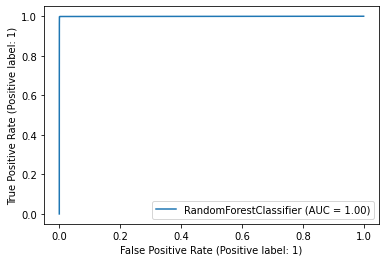

In [ ]:
#Training results
rfc2 = RandomForestClassifier(oob_score = True, criterion = "entropy")
result = rfc2.fit(X_train_pred_tfidf,y_train)
y_train_rfc_pred_tfidf = rfc2.predict(X_train_pred_tfidf)

print('Accuracy Score:', (accuracy_score(y_train, y_train_rfc_pred_tfidf)))
print('Precision Score:', (precision_score(y_train, y_train_rfc_pred_tfidf)))
print('Recall Score:', (recall_score(y_train,y_train_rfc_pred_tfidf)))
print('F1 Score:', (f1_score(y_train, y_train_rfc_pred_tfidf)))

y_score_rf_tfidf = rfc2.predict_proba(X_train_pred_tfidf)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf_tfidf[:,1])))
print(plot_roc_curve(rfc2, X_train_pred_tfidf, y_train))

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Accuracy Score: 0.9860178970917226
Precision Score: 0.96875
Recall Score: 0.7294117647058823
F1 Score: 0.832214765100671
ROC Score: 0.9122310110186177


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


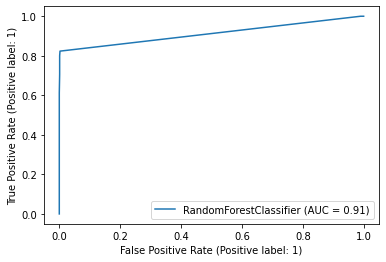

In [ ]:
nb_title_test_pred_tfidf = nb_title_tuned_tfidf.predict(X_test_title_tfidf)
nb_profile_test_pred_tfidf = nb_profile_tuned_tfidf.predict(X_test_profile_tfidf)
nb_description_test_pred_tfidf = nb_description_tuned_tfidf.predict(X_test_description_tfidf)
nb_requirements_test_pred_tfidf = nb_requirements_tuned_tfidf.predict(X_test_requirements_tfidf)
nb_benefits_test_pred_tfidf = nb_benefits_tuned_tfidf.predict(X_test_benefits_tfidf)

X_test_pred_tfidf = [nb_title_test_pred_tfidf, nb_profile_test_pred_tfidf, nb_description_test_pred_tfidf, nb_description_test_pred_tfidf, nb_benefits_test_pred_tfidf]
X_test_pred_tfidf = np.array(X_test_pred_tfidf)
X_test_pred_tfidf = X_test_pred_tfidf.T
#X_test_pred_tfidf = X_test_pred_tfidf[:,[0,2,3]]
print(X_test_pred_tfidf)

#Test results
y_test_rfc_pred_tfidf = rfc2.predict(X_test_pred_tfidf)

print('Accuracy Score:', (accuracy_score(y_test, y_test_rfc_pred_tfidf)))
print('Precision Score:', (precision_score(y_test, y_test_rfc_pred_tfidf)))
print('Recall Score:', (recall_score(y_test,y_test_rfc_pred_tfidf)))
print('F1 Score:', (f1_score(y_test, y_test_rfc_pred_tfidf)))

y_score_rf_tfidf = rfc2.predict_proba(X_test_pred_tfidf)
print('ROC Score:', (roc_auc_score(y_test, y_score_rf_tfidf[:,1])))
print(plot_roc_curve(rfc2, X_test_pred_tfidf, y_test))

Accuracy Score: 0.9854586129753915
Precision Score: 0.953125
Recall Score: 0.7261904761904762
F1 Score: 0.8243243243243242
ROC Score: 0.908824474625531

In [ ]:
x_train_bowandtfidf =  np.hstack((X_train_pred[:,[0, 1, 2,3, 4]], X_train_pred_tfidf[:,[0, 1, 2,3, 4]]))
rfc3 = RandomForestClassifier(oob_score = True, criterion = 'gini')
result3 = rfc3.fit(x_train_bowandtfidf,y_train)

Accuracy Score: 0.9996271439224459
Precision Score: 0.9948914431673053
Recall Score: 0.9974391805377721
F1 Score: 0.9961636828644502
ROC Score: 0.99930506140255


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


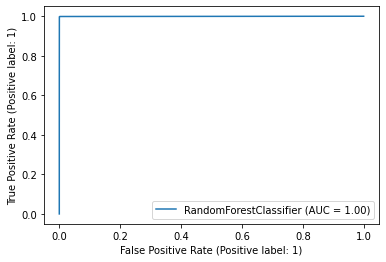

In [ ]:
y_train_rfc_pred_bowandtfidf = rfc3.predict(x_train_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_train, y_train_rfc_pred_bowandtfidf)))
print('Precision Score:', (precision_score(y_train, y_train_rfc_pred_bowandtfidf)))
print('Recall Score:', (recall_score(y_train,y_train_rfc_pred_bowandtfidf)))
print('F1 Score:', (f1_score(y_train, y_train_rfc_pred_bowandtfidf)))

y_score_rf_bowandtfidf = rfc3.predict_proba(x_train_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf_bowandtfidf[:,1])))
print(plot_roc_curve(rfc3, x_train_bowandtfidf, y_train))

Accuracy Score: 0.9871364653243848
Precision Score: 0.984375
Recall Score: 0.7411764705882353
F1 Score: 0.8456375838926175
ROC Score: 0.9013920071845533


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


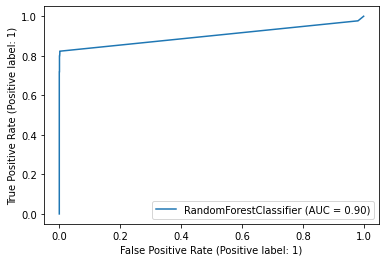

In [ ]:
X_test_bowandtfidf =  np.hstack((X_test_pred[:,[0,1 ,2,3, 4]], X_test_pred_tfidf[:,[0,1,2,3,4]]))

#Test results
y_test_rfc_pred_bowandtfidf = rfc3.predict(X_test_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_test, y_test_rfc_pred_bowandtfidf)))
print('Precision Score:', (precision_score(y_test, y_test_rfc_pred_bowandtfidf)))
print('Recall Score:', (recall_score(y_test,y_test_rfc_pred_bowandtfidf)))
print('F1 Score:', (f1_score(y_test, y_test_rfc_pred_bowandtfidf)))

y_score_rf_bowandtfidf = rfc3.predict_proba(X_test_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_test, y_score_rf_bowandtfidf[:,1])))
print(plot_roc_curve(rfc3, X_test_bowandtfidf, y_test))

Accuracy Score: 0.9848993288590604
Precision Score: 0.9523809523809523
Recall Score: 0.7142857142857143
F1 Score: 0.8163265306122449
ROC Score: 0.9088070087189806

Text(0, 0.5, 'Mean decrease in impurity')

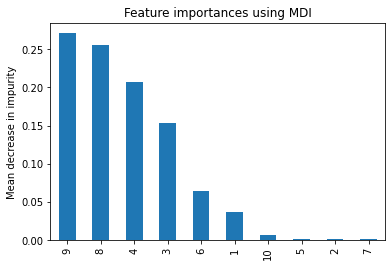

In [ ]:
rf_importances = rfc3.feature_importances_
# rf_std = np.std([tree.feature_importances_ for tree in model_rf.best_estimator_.estimators_], axis=0)

feature_names = [f"{i}" for i in list([1,2,3,4,5,6,7,8,9,10])]
forest_importances = pd.Series(rf_importances, index=feature_names)
most_important = forest_importances[forest_importances > 0.00]
most_important = most_important.sort_values(ascending=False)

fig, ax = plt.subplots()
most_important.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

## Support Vector Machine
SVC(C= 10.0,degree= 2, kernel= 'rbf', probability = True) are determined to be the best parameters.

In [ ]:
from sklearn.svm import SVC

svm_parameters = {'C': np.logspace(-1, 1, 3),
                  'kernel': ('linear', 'poly','rbf'),
                  'degree': [2,3]}

svm = GridSearchCV(estimator=SVC(probability=True),
                         param_grid= svm_parameters,
                         cv = 3,
                         scoring='roc_auc',
                         verbose = 3).fit(x_train_bowandtfidf,y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ....C=0.1, degree=2, kernel=linear;, score=0.998 total time=   0.1s
[CV 2/3] END ....C=0.1, degree=2, kernel=linear;, score=0.996 total time=   0.1s
[CV 3/3] END ....C=0.1, degree=2, kernel=linear;, score=1.000 total time=   0.1s
[CV 1/3] END ......C=0.1, degree=2, kernel=poly;, score=0.998 total time=   0.1s
[CV 2/3] END ......C=0.1, degree=2, kernel=poly;, score=0.992 total time=   0.1s
[CV 3/3] END ......C=0.1, degree=2, kernel=poly;, score=1.000 total time=   0.2s
[CV 1/3] END .......C=0.1, degree=2, kernel=rbf;, score=0.998 total time=   0.6s
[CV 2/3] END .......C=0.1, degree=2, kernel=rbf;, score=1.000 total time=   0.7s
[CV 3/3] END .......C=0.1, degree=2, kernel=rbf;, score=1.000 total time=   0.7s
[CV 1/3] END ....C=0.1, degree=3, kernel=linear;, score=0.998 total time=   0.1s
[CV 2/3] END ....C=0.1, degree=3, kernel=linear;, score=0.996 total time=   0.1s
[CV 3/3] END ....C=0.1, degree=3, kernel=linear;

Accuracy Score: 0.9996271439224459
Precision Score: 0.9948914431673053
Recall Score: 0.9974391805377721
F1 Score: 0.9961636828644502
ROC Score: 0.9979444535829938


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


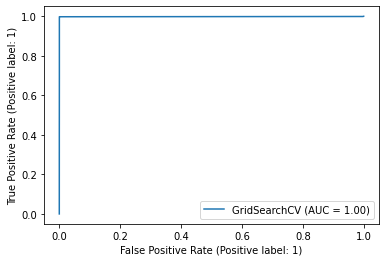

In [ ]:
#svm = SVC(C= 10.0,degree= 2, kernel= 'rbf', probability = True).fit(x_train_bowandtfidf,y_train)
ypred = svm.predict(x_train_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_train, ypred)))
print('Precision Score:', (precision_score(y_train, ypred)))
print('Recall Score:', (recall_score(y_train,ypred)))
print('F1 Score:', (f1_score(y_train, ypred)))

y_score = svm.predict_proba(x_train_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_train, y_score[:,1])))
print(plot_roc_curve(svm, x_train_bowandtfidf, y_train))

Accuracy Score: 0.9888143176733781
Precision Score: 0.9452054794520548
Recall Score: 0.8117647058823529
F1 Score: 0.8734177215189873
ROC Score: 0.901758143069324


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


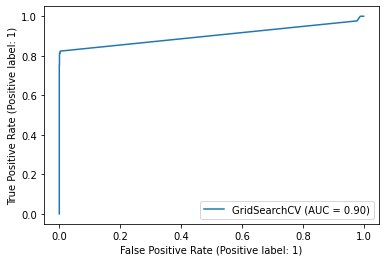

In [ ]:
ypred_test = svm.predict(X_test_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_test, ypred_test)))
print('Precision Score:', (precision_score(y_test, ypred_test)))
print('Recall Score:', (recall_score(y_test,ypred_test)))
print('F1 Score:', (f1_score(y_test, ypred_test)))

y_score = svm.predict_proba(X_test_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_test, y_score[:,1])))
print(plot_roc_curve(svm, X_test_bowandtfidf, y_test))


Text(0.5, 1.0, 'Most important features in SVM model')

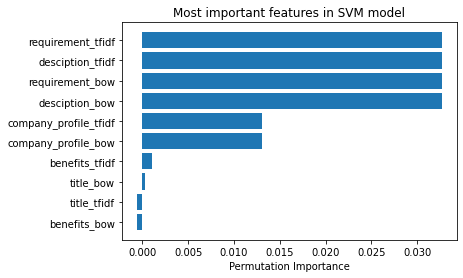

In [ ]:
from sklearn.inspection import permutation_importance
svm = SVC(C= 10.0,degree= 2, kernel= 'rbf', probability = True).fit(x_train_bowandtfidf,y_train)
perm_importance = permutation_importance(svm, X_test_bowandtfidf, y_test)

feature_names = ['title_bow', 'company_profile_bow', 'desciption_bow', 'requirement_bow', 'benefits_bow', 'title_tfidf', 'company_profile_tfidf', 'desciption_tfidf', 'requirement_tfidf', 'benefits_tfidf']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Most important features in SVM model")



In [ ]:
#The best parameters for svm
print(svm_search.best_params_)

{'C': 0.1, 'degree': 2, 'kernel': 'linear'}


In [ ]:
#Most important ngrams
desc_nb_tfidf = MultinomialNB(alpha= 0, fit_prior = True)
requirement_nb_tfidf = MultinomialNB(alpha= 0, fit_prior = True)

desc_result = desc_nb_tfidf.fit(X_train_description_tfidf, y_train)
requirement_result = requirement_nb_tfidf.fit(X_train_requirements_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [ ]:
pos_class_prob_sorted_description = desc_nb_tfidf.feature_log_prob_[1, :].argsort()[::-1]
print(np.take(tfidf_vect_description.get_feature_names_out(), pos_class_prob_sorted_description[:10]))

['work' 'amp' 'We' 'position' 'skills' 'home' 'data' 'customer'
 'experience' 'entry']


In [ ]:
pos_class_prob_sorted_description = requirement_nb_tfidf.feature_log_prob_[1, :].argsort()[::-1]
print(np.take(tfidf_vect_description.get_feature_names_out(), pos_class_prob_sorted_description[:10]))

['attention desire' 'Free Salary' 'Free housing2' 'Free onsite'
 'events niche Meetups' 'herOur' 'Program IIPP' 'Did obtain'
 'balance sheet major emphasis' 'efficiently create localised']


## Logistic Regression
{'C': 0.1, 'penalty': 'l2', 'random_state': 1234, 'solver': 'liblinear'}  <br> The above is the determined best parameters.
<br> I did not choose this model as it underperformed in terms of ROC-AUC and F1 compared to the support vector machine.

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=1.000 total time=   0.0s
[CV 2/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=0.996 total time=   0.0s
[CV 3/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=1.000 total time=   0.0s
[CV 1/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=1.000 total time=   0.2s
[CV 2/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=0.996 total time=   0.2s
[CV 3/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=1.000 total time=   0.2s
[CV 1/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=1.000 total time=   0.0s
[CV 2/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=0.998 total time=   0.0s
[CV 3/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=1.000 total time=   0.0s
[CV 1/3] END C=0.1, penalty=l2, random_state=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


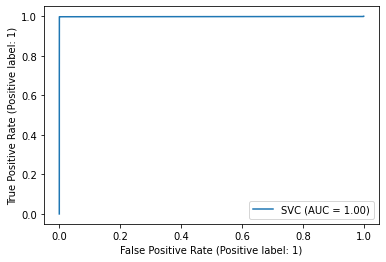

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_parameters = {'solver': ['liblinear', 'saga'],
                 'penalty': ["l1", "l2"],
                 'C': [0.1, 1, 10, 100, 200],
                 'random_state': [1234]}

logreg_tune = LogisticRegression(max_iter=5000)
lg_tune = GridSearchCV(logreg_tune,
                        lg_parameters,
                        cv = 3,
                        scoring = 'roc_auc',
                        verbose = 3)

logreg = lg_tune.fit(x_train_bowandtfidf,y_train)

#logreg = LogisticRegression(penalty="none", max_iter=5000, random_state=1234)
logreg.fit(x_train_bowandtfidf,y_train)
ypred = logreg.predict(x_train_bowandtfidf)
print('Accuracy Score:', (accuracy_score(y_train, ypred)))
print('Precision Score:', (precision_score(y_train, ypred)))
print('Recall Score:', (recall_score(y_train,ypred)))
print('F1 Score:', (f1_score(y_train, ypred)))

y_score = svm.predict_proba(x_train_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_train, y_score[:,1])))
print(plot_roc_curve(svm, x_train_bowandtfidf, y_train))

Accuracy Score: 0.9871364653243848
Precision Score: 0.984375
Recall Score: 0.7411764705882353
F1 Score: 0.8456375838926175
ROC Score: 0.8951711512555697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


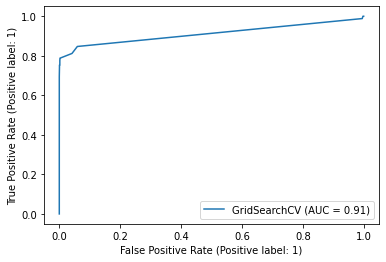

In [ ]:
ypred_test = logreg.predict(X_test_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_test, ypred_test)))
print('Precision Score:', (precision_score(y_test, ypred_test)))
print('Recall Score:', (recall_score(y_test,ypred_test)))
print('F1 Score:', (f1_score(y_test, ypred_test)))

y_score = svm.predict_proba(X_test_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_test, y_score[:,1])))
print(plot_roc_curve(logreg, X_test_bowandtfidf, y_test))


In [ ]:
# Accuracy Score: 0.9860178970917226
# Precision Score: 0.927536231884058
# Recall Score: 0.7619047619047619
# F1 Score: 0.8366013071895425
# ROC Score: 0.9262659289067741

In [ ]:
print(logreg.best_params_)

{'C': 200, 'penalty': 'l2', 'random_state': 1234, 'solver': 'liblinear'}


#Conclusion
The first level of the Ensemble comprises of 5 BOW matrices fed into the 5

# Experiment (old codes)

In [ ]:
#this section was the old code which was used in an attempt to perform the first version of NLP. 
#import re
#import string
#import numpy as np
#import pandas as pd
#import random
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
#from sklearn.base import TransformerMixin
#from sklearn.metrics import accuracy_score, plot_confusion_matrix, #classification_report, confusion_matrix
#import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.lang.en import English

#import nltk
#nltk.download('omw-1.4')
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer 
#from nltk.stem.snowball import SnowballStemmer



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#path = "/content/drive/MyDrive/mystuff/bt4012/"
#df=pd.read_csv(path + 'fake_job_postings.csv')

In [ ]:
#df.head()

In [ ]:
#df.isnull().sum()
#Clean up dataset for NLP
#df['text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
#df_nlp0 = df[['text','job_id','fraudulent',]].copy()
#verify clean up 
#print(df_nlp0.head())

In [ ]:
#import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.lang.en import English
#stop_words = spacy.lang.en.stop_words.STOP_WORDS
#punctuation = string.punctuation

#def spacy_tokenizer(sentence):
#    tokens = English(sentence)
#    tokens = [ word.lemma_.lower().strip() 
#              if word.lemma_ != "-PRON-" 
#              else word.lower_ for word in tokens]
#    tokens = [ word for word in tokens 
#              if word not in stop_words and word not in punctuation]
#    return tokens
    
#def clean_text(text):
#    return text.strip().lower()

#df_nlp0['text'] = df_nlp0['text'].apply(clean_text)
#df_nlp0.head()

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#tf = TfidfVectorizer(max_features = 150)
#t = tf.fit_transform(df_nlp0['text'])
#df_nlp2 = pd.DataFrame(t.toarray(), columns=tf.get_feature_names_out())
#df_nlp0.drop(['text'], axis=1, inplace=True)
#df_nlp_t = pd.concat([df_nlp2,df_nlp0], axis=1)
#df_nlp_t.head()

In [ ]:
#Y = df_nlp_t.iloc[:,-1]
#X = df_nlp_t.iloc[:,:-1]

#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=1)
#X_test, X_val, y_test, y_val = train_test_split(X_test,Y_test,test_size=0.5, random_state=42) 

#print("X_train",X_train.shape)
#print("y_Train:",y_train.shape)
#print("X_Test",X_test.shape)
#print("y_test:",y_test.shape)
# print("X_val",X_val.shape)
# print("y_val", y_val.shape)

In [ ]:
#Log regress
#from sklearn.linear_model import LogisticRegression

#LR = LogisticRegression(C=5e1, solver='lbfgs',multi_class='multinomial', random_state=17, n_jobs=4)
#LR_model=LR.fit(X_train, y_train)
#LR_pred_test = LR_model.predict(X_test)
# LR_pred_val = LR_model.predict(X_val)
#LR_score_test = accuracy_score(y_test, LR_pred_test)
# LR_score_val = accuracy_score(y_val, LR_pred_val)
#LR_cr_report_test = classification_report(y_test,LR_pred_test)
# LR_cr_report_val = classification_report(y_val,LR_pred_val)
#LR_cf_matrix_test = confusion_matrix(y_test, LR_pred_test)
# LR_cf_matrix_val = confusion_matrix(y_val, LR_pred_val)
#print("LR Score - Test set:",LR_score_test)
#print("LR Score - Validation set:",LR_score_val)
#print("Classification Report - Test set\n")
#print(LR_cr_report_test)
# print("Classification Report - Validation set\n")
# print(LR_cr_report_val)
#print("Confusion Matrix - test set\n")
#print(LR_cf_matrix_test)
# print("Confusion Matrix - Validation set\n")
# print(LR_cf_matrix_val)

In [ ]:
#RFC 
#from sklearn.ensemble import RandomForestClassifier
#rfc= RandomForestClassifier(n_jobs=3,oob_score=True, criterion="gini")
#rfc_model=rfc.fit(X_train,y_train)
#rfc_pred_test = rfc_model.predict(X_test)
#rfc_pred_val = rfc_model.predict(X_val)
#rfc_score_test = accuracy_score(y_test, rfc_pred_test)
#rfc_score_val = accuracy_score(y_val,rfc_pred_val)
#rfc_cr_report_test=classification_report(y_test,rfc_pred_test)
#rfc_cr_report_val=classification_report(y_val,rfc_pred_val)
#rfc_cf_matrix_test = confusion_matrix(y_test, rfc_pred_test)
#rfc_cf_matrix_val = confusion_matrix(y_val,rfc_pred_val)

In [ ]:
#print("Score - Test set:",rfc_score_test)
#print("Score - Validation set:",rfc_score_val)
#print("Classification Report - Test set\n")
#print(rfc_cr_report_test)
# print("Classification Report - Validation set\n")
# print(rfc_cr_report_val)
#print("Confusion Matrix - test set\n")
#print(rfc_cf_matrix_test)
# print("Confusion Matrix - Validation set\n")
# print(rfc_cf_matrix_val)

In [ ]:
 #group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
#group_counts_test = ["{0:0.0f}".format(value) for value in rfc_cf_matrix_test.flatten()]
#group_counts_val = ["{0:0.0f}".format(value) for value in rfc_cf_matrix_val.flatten()]
#group_percentages_test = ["{0:.2%}".format(value) for value in
                      #rfc_cf_matrix_test.flatten()/np.sum(rfc_cf_matrix_test)]
#group_percentages_val = ["{0:.2%}".format(value) for value in
                      #rfc_cf_matrix_val.flatten()/np.sum(rfc_cf_matrix_val)]
#labels_test = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts_test,group_percentages_test)]
#labels_val = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          #zip(group_names,group_counts_val,group_percentages_val)]
#labels_test = np.asarray(labels_test).reshape(2,2)
#labels_val = np.asarray(labels_val).reshape(2,2)
#plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
#plt.title("Confusion Matrix - Test set")
#sns.heatmap(rfc_cf_matrix_test, annot=labels_test,fmt='', cmap='Greens')
#plt.subplot(1,2,2)
# plt.title("Confusion Matrix - Validation Set")
# sns.heatmap(rfc_cf_matrix_val, annot=labels_val,fmt='', cmap='coolwarm_r')
# plt.show()

In [ ]:
#Hype parameter tuning RFC
#RFC_acc = 0
#for criterion in ['gini', 'entropy']:
#  for n_jobs in [ 1, 2 , 3 , 4]:
#    for oob_score in ['True' , 'False']:
#       RFC_model_hp = RandomForestClassifier(criterion=criterion, n_jobs=n_jobs,oob_score=oob_score)
#       RFC_model_hp.fit(X_train, y_train)
#       RFC_test_predictions = RFC_model_hp.predict(X_test)
#       test_rfc = accuracy_score(y_test, RFC_test_predictions)
#       test_rfc_cr=classification_report(y_test,RFC_test_predictions)
#       if test_rfc > RFC_acc:
#         RFC_parameters = f"n_jobs:{n_jobs}, criterion:{criterion}, oob_score:{oob_score}"
#         RFC_acc = test_rfc

In [ ]:
#print(RFC_parameters)
#print("HyperParameter tuning score (test set):",RFC_acc ,"\nExisting Model score (test set) :", rfc_score_test )
#print("Classification report\n ", test_rfc_cr )

In [ ]:
#Decision Tree 
#DecisionTreeClassifier
#from sklearn.tree import DecisionTreeClassifier
#DT_class = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=10)
#DT_class = DT_class.fit(X_train,y_train)
#DT_pred_test = DT_class.predict(X_test)
#DT_pred_val = DT_class.predict(X_val)
#DT_score_test = accuracy_score(y_test, DT_pred_test)
#DT_score_val = accuracy_score(y_val,DT_pred_val)
#DT_cr_report_test=classification_report(y_test,DT_pred_test)
#DT_cr_report_val=classification_report(y_val,DT_pred_val)
#DT_cf_matrix_test = confusion_matrix(y_test, DT_pred_test)
#DT_cf_matrix_val = confusion_matrix(y_val,DT_pred_val)
#print("DT Score - Test set:",DT_score_test)
#print("DT Score - Validation set:",DT_score_val)
#print("Classification Report - Test set\n")
#print(DT_cr_report_test)
# print("Classification Report - Validation set\n")
# print(DT_cr_report_val)
#print("Confusion Matrix - test set\n")
#print(DT_cf_matrix_test)
# print("Confusion Matrix - Validation set\n")
# print(DT_cf_matrix_val)

In [ ]:
#DTC_acc = 0 

#for criterion in ['gini', 'entropy']:
#  for max_depth in [7,8,9,10]:
#    for min_samples_leaf in [5,10,20,30]:
#      DTC_model_hp = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
#      DTC_model_hp.fit(X_train, y_train)
#      DTC_test_predictions = DTC_model_hp.predict(X_test)
#      test_dtc = accuracy_score(y_test, DTC_test_predictions)
#      test_dtc_cr=classification_report(y_test,DTC_test_predictions)
#      if test_dtc > DTC_acc:
#        DTC_parameters = f"criterion:{criterion}, max_depth:{max_depth},min_samples_leaf:{min_samples_leaf}"
#        DTC_acc = test_dtc

In [ ]:
#print(DTC_parameters)
#print("HyperParameter tuning score (test set):",DTC_acc ,"\nExisting Model score (test set) :", DT_score_test )
#print("Classification report\n ", test_dtc_cr )

In [ ]:
#from sklearn.naive_bayes import MultinomialNB
#nb_clf = MultinomialNB()
#nb_clf.fit(X_train,y_train)
#y_trainpred = nb_clf.predict(X_train) #evaluate model on training
#y_testpred = nb_clf.predict(X_test) #evaluate on test

In [ ]:
#nb_pred = nb_clf.predict(X_test)
#nb_score = accuracy_score(y_test, nb_pred)
#print(nb_score)

In [ ]:
#print("Classification Report\n")
#print(classification_report(y_test,nb_pred))
#print("Confusion Matrix\n")
#print(confusion_matrix(y_test, nb_pred))

In [ ]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve,roc_curve
#print("===================Logistic Regression================\n")
#print("LogReg Accuracy Score :", (accuracy_score(y_test,LR_pred_test)))
#print("LogReg Precision Score :", (precision_score(y_test,LR_pred_test)))
#print("LogReg Recall Score :", (recall_score(y_test,LR_pred_test)))
#print("LogReg F1 Score :", (f1_score(y_test,LR_pred_test)))
#print("LogReg ROC/AUC Score :", (roc_auc_score(y_test,LR_pred_test)))
#print("======================RFC=============================\n")
#print("RFC Acccuracy Score : ", (accuracy_score(y_test,rfc_pred_test)))
#print("RFC Precision Score : ", (precision_score(y_test, rfc_pred_test)))
#print("RFC Recall Score : ", (recall_score(y_test, rfc_pred_test)))
#print("RFC F1 Score : ", (f1_score(y_test, rfc_pred_test)))
#print("RFC ROC/AUC Score : ", (roc_auc_score(y_test, rfc_pred_test)))
#print("===================Decision Tree=====================\n")
#print("DTree Accuracy Score : ", (accuracy_score(y_test, DT_pred_test)))
#print("DTree Precision Score : ", (precision_score(y_test, DT_pred_test)))
#print("DTree Recall Score : ", (recall_score(y_test, DT_pred_test)))
#print("DTree F1 Score : ", (f1_score(y_test, DT_pred_test)))
#print("DTree ROC/AUC Score : ", (roc_auc_score(y_test, DT_pred_test)))
#print("===================Naive Bayes=====================\n")
#print("NB Accuracy Score : ", (accuracy_score(y_test, nb_pred)))
#print("NB Precision Score : ", (precision_score(y_test, nb_pred)))
#print("NB Recall Score : ", (recall_score(y_test, nb_pred)))
#print("NB F1 Score : ", (f1_score(y_test, nb_pred)))